In [1]:
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import keras

Using TensorFlow backend.
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
input_shape = (150, 150, 3)

In [3]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
import pandas as pd
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [5]:
import import_ipynb
from Dataset_utils import *

importing Jupyter notebook from Dataset_utils.ipynb


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))              

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

#### use epochs = 100 instead 5

In [9]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=5,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
100/100 [==============================] - 1364s 14s/step - loss: 0.5752 - acc: 0.6830 - val_loss: 0.3310 - val_acc: 0.8630
Epoch 2/5
100/100 [==============================] - 1412s 14s/step - loss: 0.4067 - acc: 0.8137 - val_loss: 0.2352 - val_acc: 0.8890
Epoch 3/5
100/100 [==============================] - 1309s 13s/step - loss: 0.3344 - acc: 0.8577 - val_loss: 0.2056 - val_acc: 0.9090
Epoch 4/5
100/100 [==============================] - 1308s 13s/step - loss: 0.2931 - acc: 0.8747 - val_loss: 0.2289 - val_acc: 0.9130
Epoch 5/5
100/100 [==============================] - 1416s 14s/step - loss: 0.2726 - acc: 0.8877 - val_loss: 0.2021 - val_acc: 0.9100


In [10]:
# save model
model.save('pre_trained_fine_tune_with_augmentation_tlearn.h5')
# save history
import pickle
f = open('pre_trained_fine_tune_with_augmentation_tlearn.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [11]:
# load history
import pickle
file = 'pre_trained_tlearn.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

#### plot_graph(performance, hist, 100) 

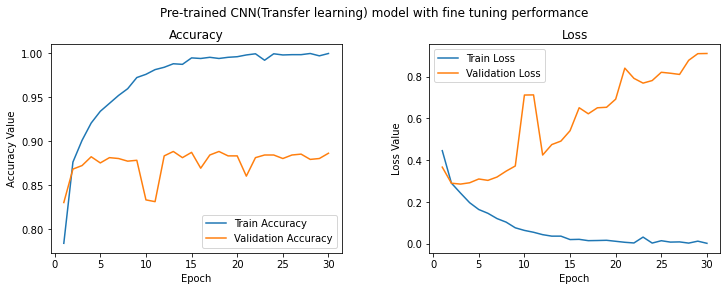

In [15]:
# plot graph
import import_ipynb
from model_summary import *
performance = 'Pre-trained CNN(Transfer learning) model with fine tuning performance'
plot_graph(performance, hist, 30)